In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format='retina'

# Creating movies

In [14]:
mov = xmovie.Movie(ds_coarse.UVEL.isel(Z=0), vmin=-1, vmax=1.5)
mov.save('movie_uvel.mp4', overwrite_existing=True)

KeyboardInterrupt: 

In [ ]:
mov = xmovie.Movie(ds.UVEL.isel(Z=0), vmin=-1, vmax=1.5)
mov.save('movie_uvel_fine.mp4', overwrite_existing=True)

In [ ]:
ds_realcoarse = xm.open_mdsdataset(data_dir="/projects/0/topios/hydrodynamic_data/MITgcm/ACC/ACC_coarse_GM_1y", prefix=["dynDiag", "surfDiag"], calendar="360_days")

In [ ]:
# Correct timestamps
ds_realcoarse = ds_realcoarse.assign_coords(
    {"time": ds_realcoarse["time"].values.astype("timedelta64[s]").astype("float64") * 300}
)
ds_realcoarse["time"].attrs["units"] = "seconds since 1900-01-01"
ds_realcoarse["time"].attrs["calendar"] = "360_day"
ds_realcoarse = xr.decode_cf(ds_realcoarse)

In [67]:
mov = xmovie.Movie(ds_realcoarse.UVEL.isel(Z=0, time=slice(0, 180)), vmin=-1, vmax=1.5)
mov.save('movie_uvel_realcoarse.mp4', overwrite_existing=True)

Movie created at movie_UVEL_realcoarse.mp4


# Plots

In [2]:
outdir = '/scratch/daanr/trajectories/'
ds_fine_adv = xr.open_dataset(outdir+"trelease_a_advection_fine_p50000_dt20m.nc")
ds_fine_diff_EOS = xr.open_dataset(outdir+"trelease_a_HR_K8_EOS_p50000_dt20m.nc")
ds_coarse_diff_EOS = xr.open_dataset(outdir+"trelease_a_LR_K1000_EOS_p50000_dt20m.nc")
ds_coarse_diff_S = xr.open_dataset(outdir+"trelease_a_LR_K1000_SampledS_p50000_dt20m.nc")
ds_coarse_diff_S_EM = xr.open_dataset(outdir+"trelease_a_LR_K1000_SampledS_p50000_dt20m_EM.nc")
ds_coarse_adv = xr.open_dataset(outdir+"trelease_a_advection_coarse_p50000_dt20m.nc")

In [3]:
ds_field_fine = xr.open_dataset('/scratch/daanr/ACC_180d_a_fine_with_slopes.nc')
ds_field_coarse = xr.open_dataset('/scratch/daanr/ACC_180d_a_coarse_with_slopes.nc')

In [4]:
tracerTot_coarse = ds_field_coarse.SALT*ds_field_coarse.drF*ds_field_coarse.rA

In [5]:
C0 = float(tracerTot_coarse.sum(dim=('Z', 'XC', 'YC'))[0].data)

/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: invalid value encountered in

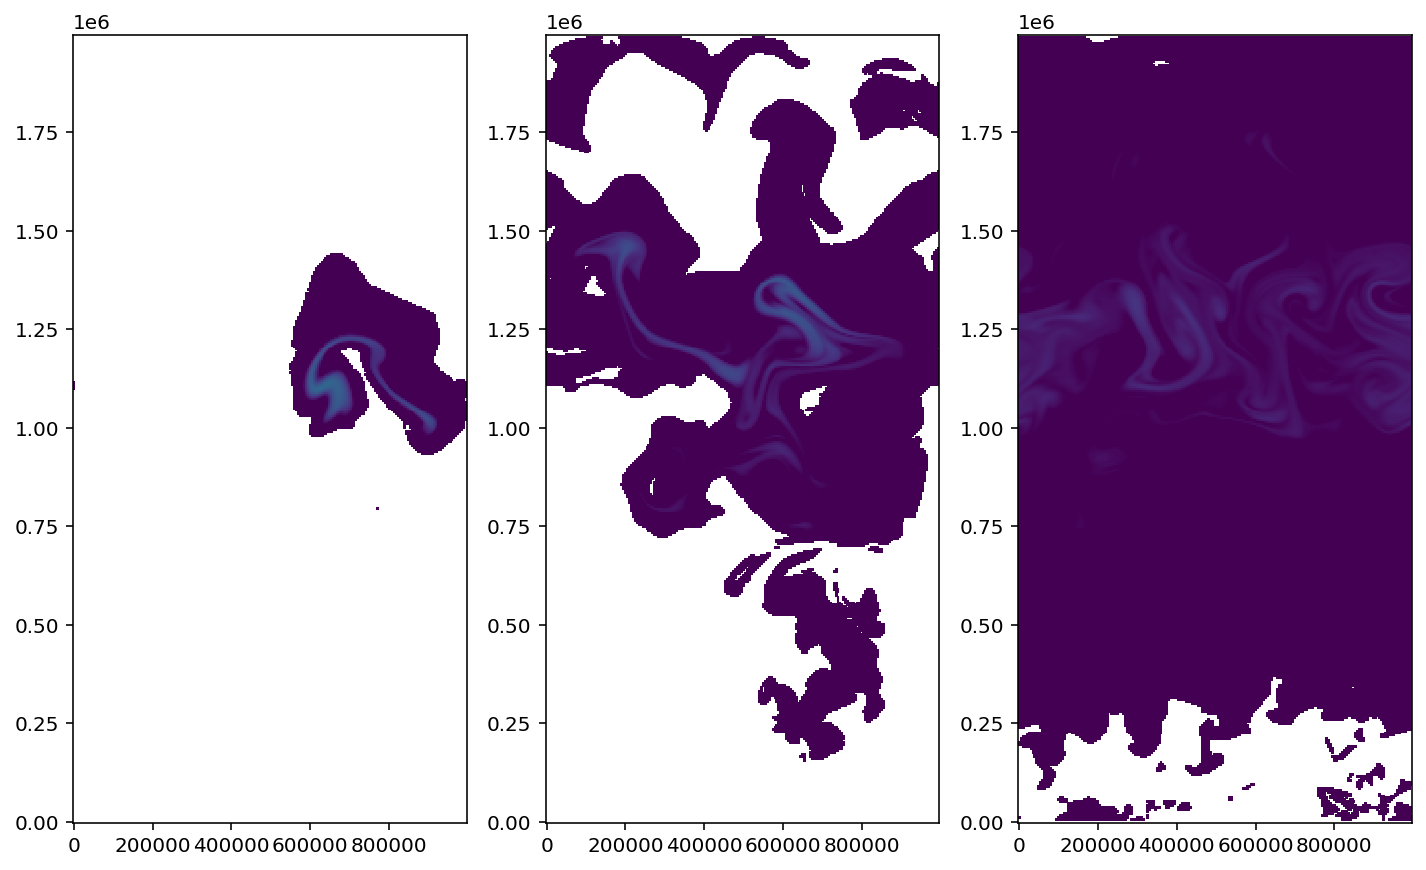

/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/nethome/4302001/miniconda3/lib/python3.7/site-packages/xarray/core/computation.py:700: RuntimeWarning: invalid value encountered in

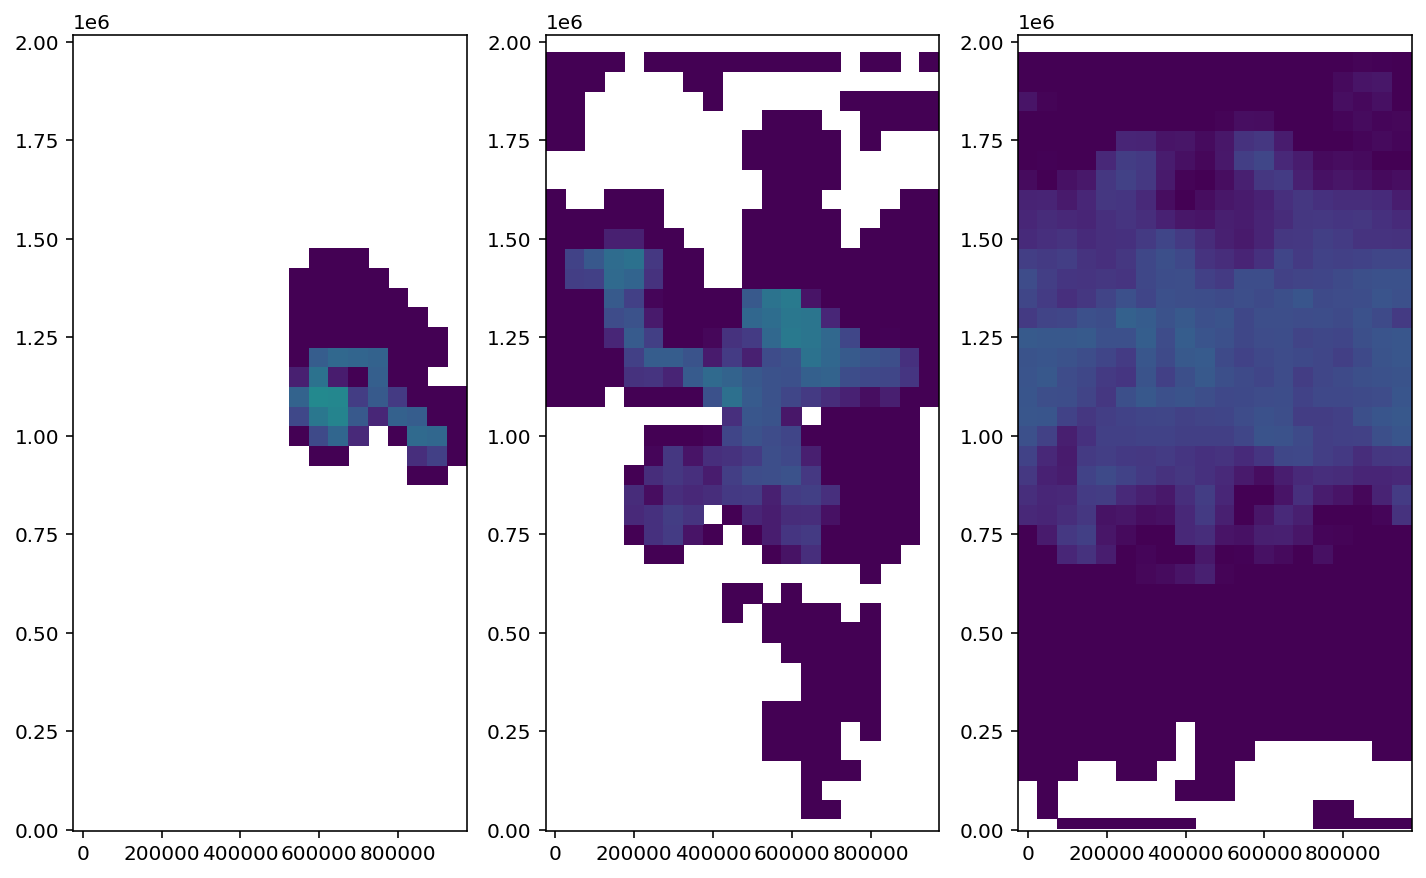

In [7]:
for ds in [ds_field_fine, ds_field_coarse]:
    fig, ax = plt.subplots(ncols=3, figsize=(12, 8))
    ax[0].pcolormesh(ds.XG, ds.YG, np.log10((ds.SALT/(C0/ds.rA*ds.drF)).isel(Z=22, time=15)), vmin=-10, vmax=0, shading='auto')
    ax[0].set_aspect(1)
    ax[1].pcolormesh(ds.XG, ds.YG, np.log10((ds.SALT/(C0/ds.rA*ds.drF)).isel(Z=22, time=60)), vmin=-10, vmax=0, shading='auto')
    ax[1].set_aspect(1)
    ax[2].pcolormesh(ds.XG, ds.YG, np.log10((ds.SALT/(C0/ds.rA*ds.drF)).isel(Z=22, time=-1)), vmin=-10, vmax=0, shading='auto')
    ax[2].set_aspect(1)
    plt.show()

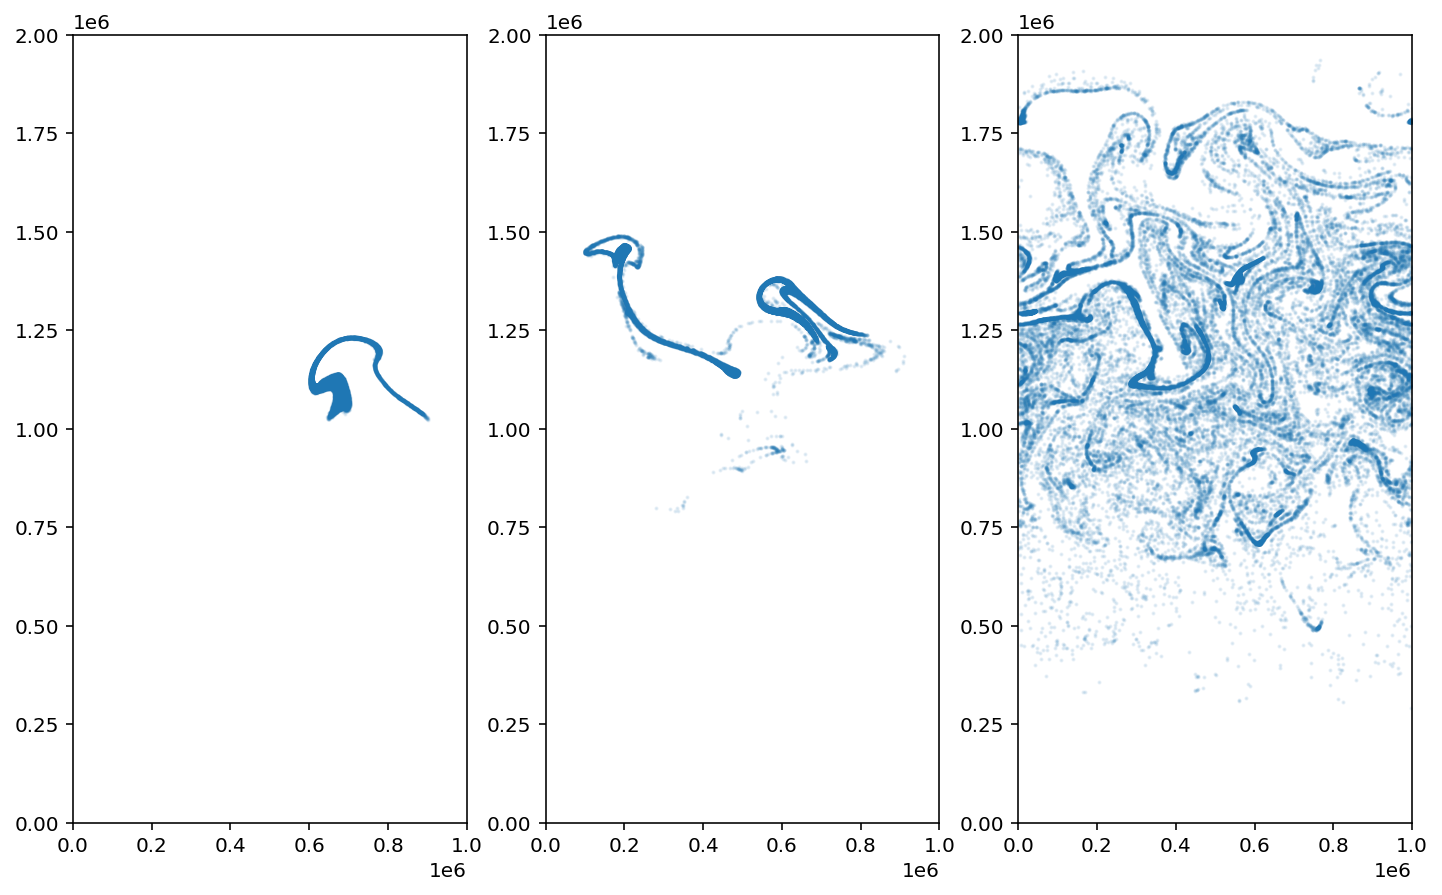

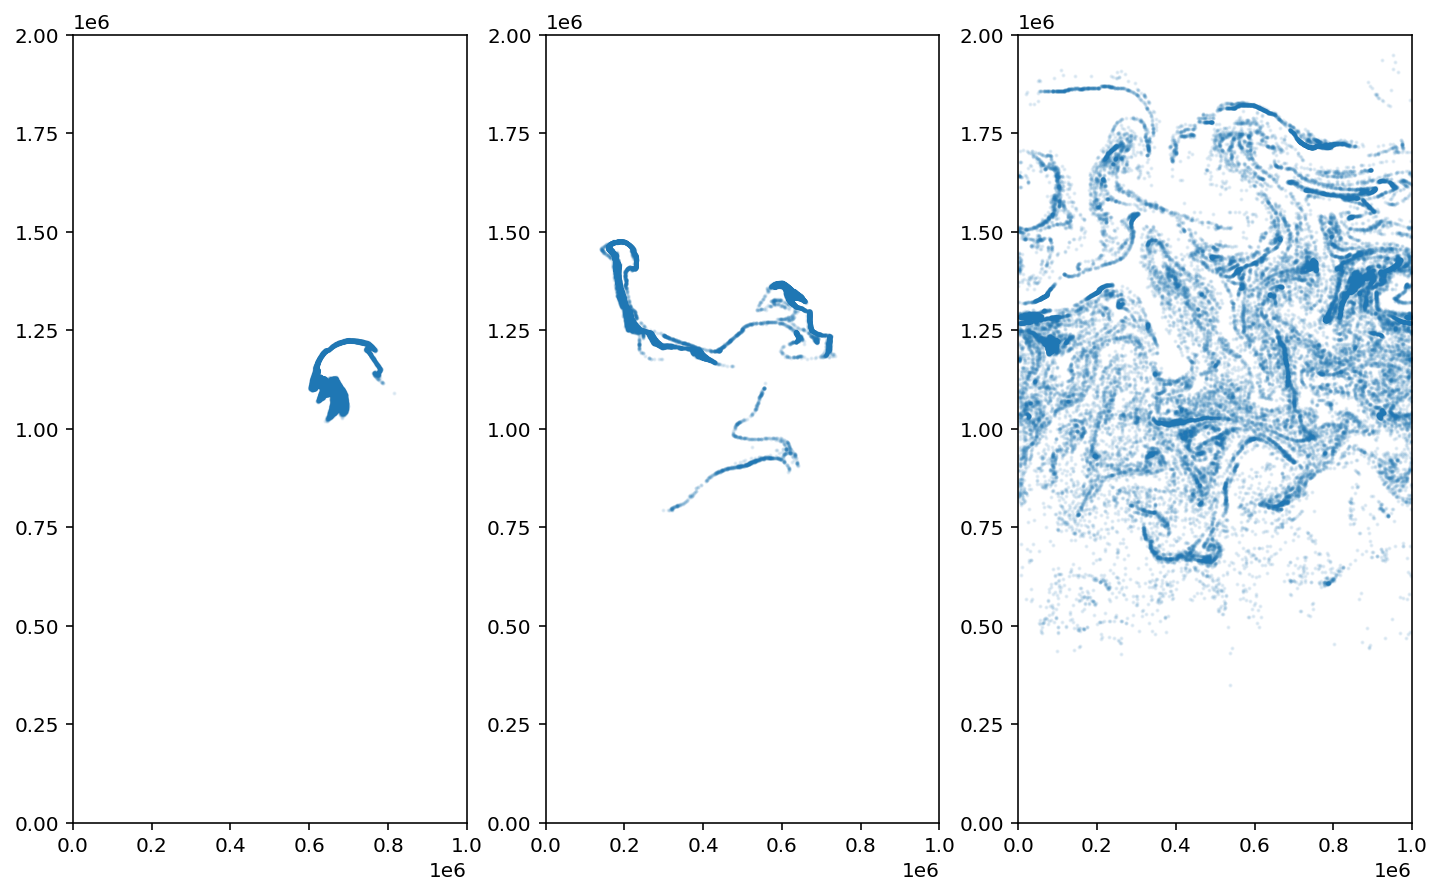

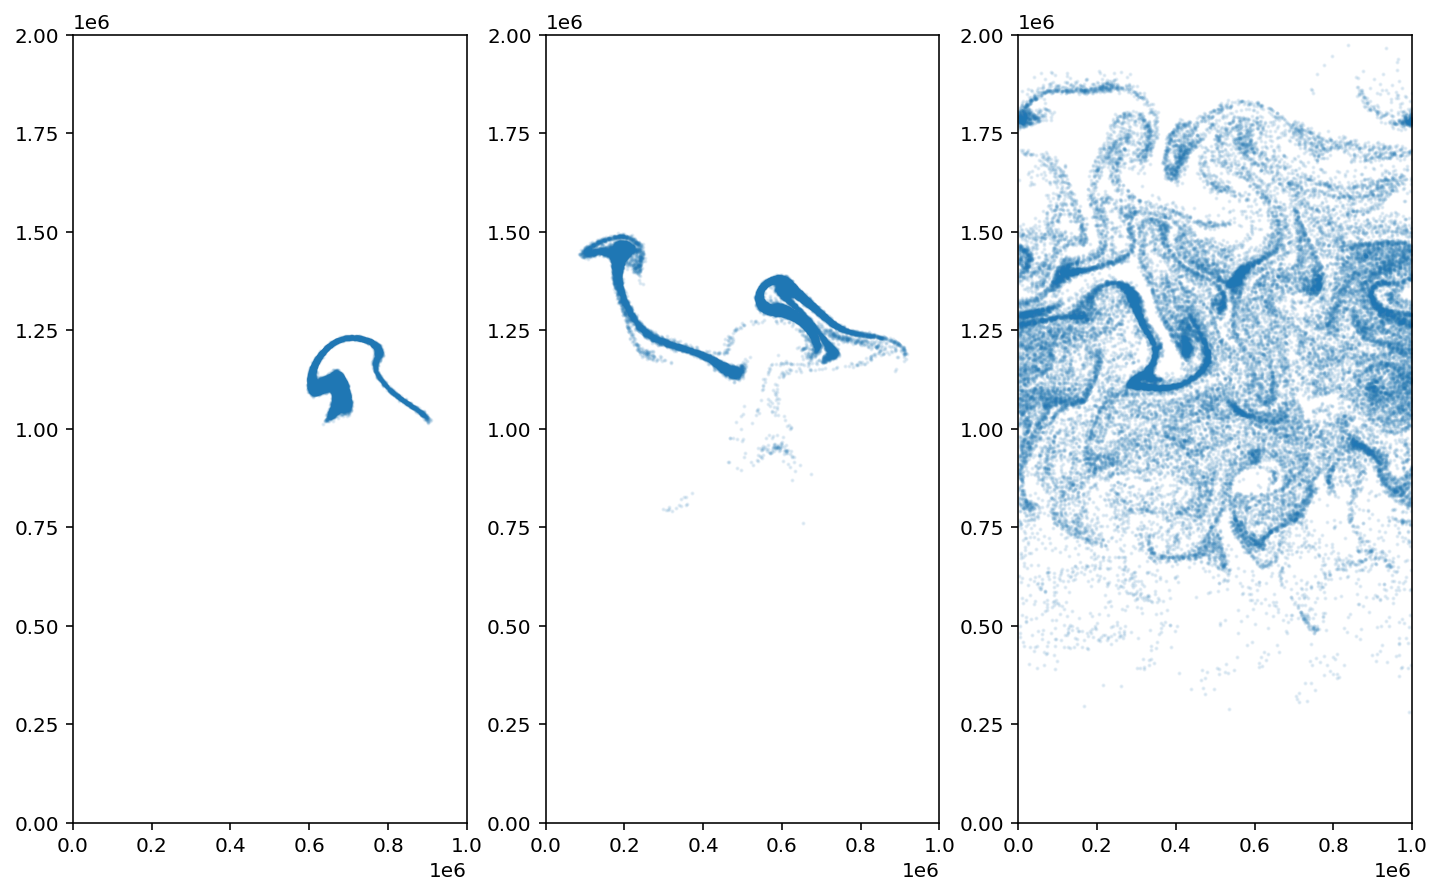

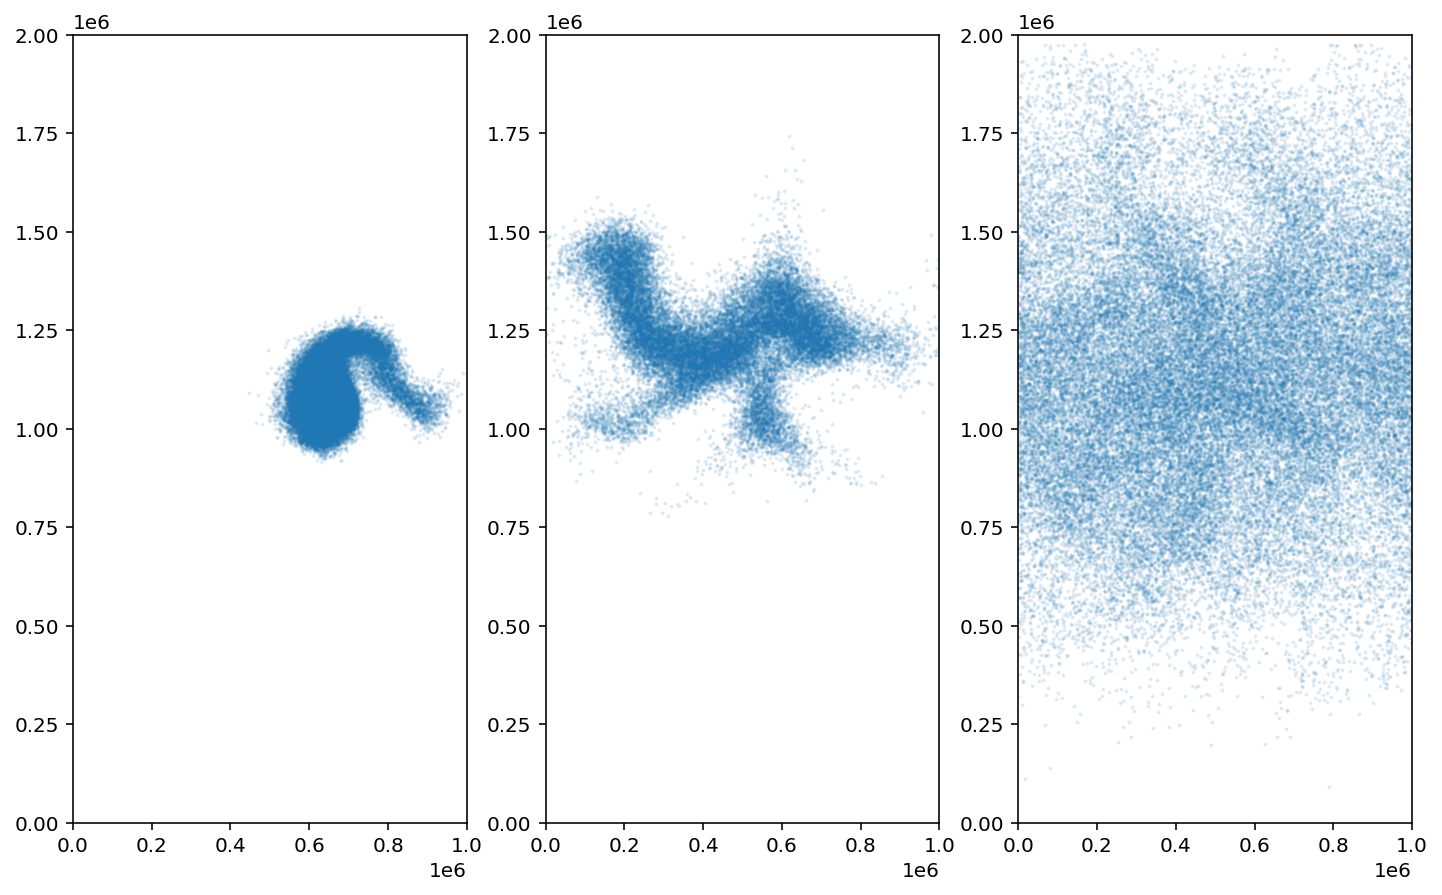

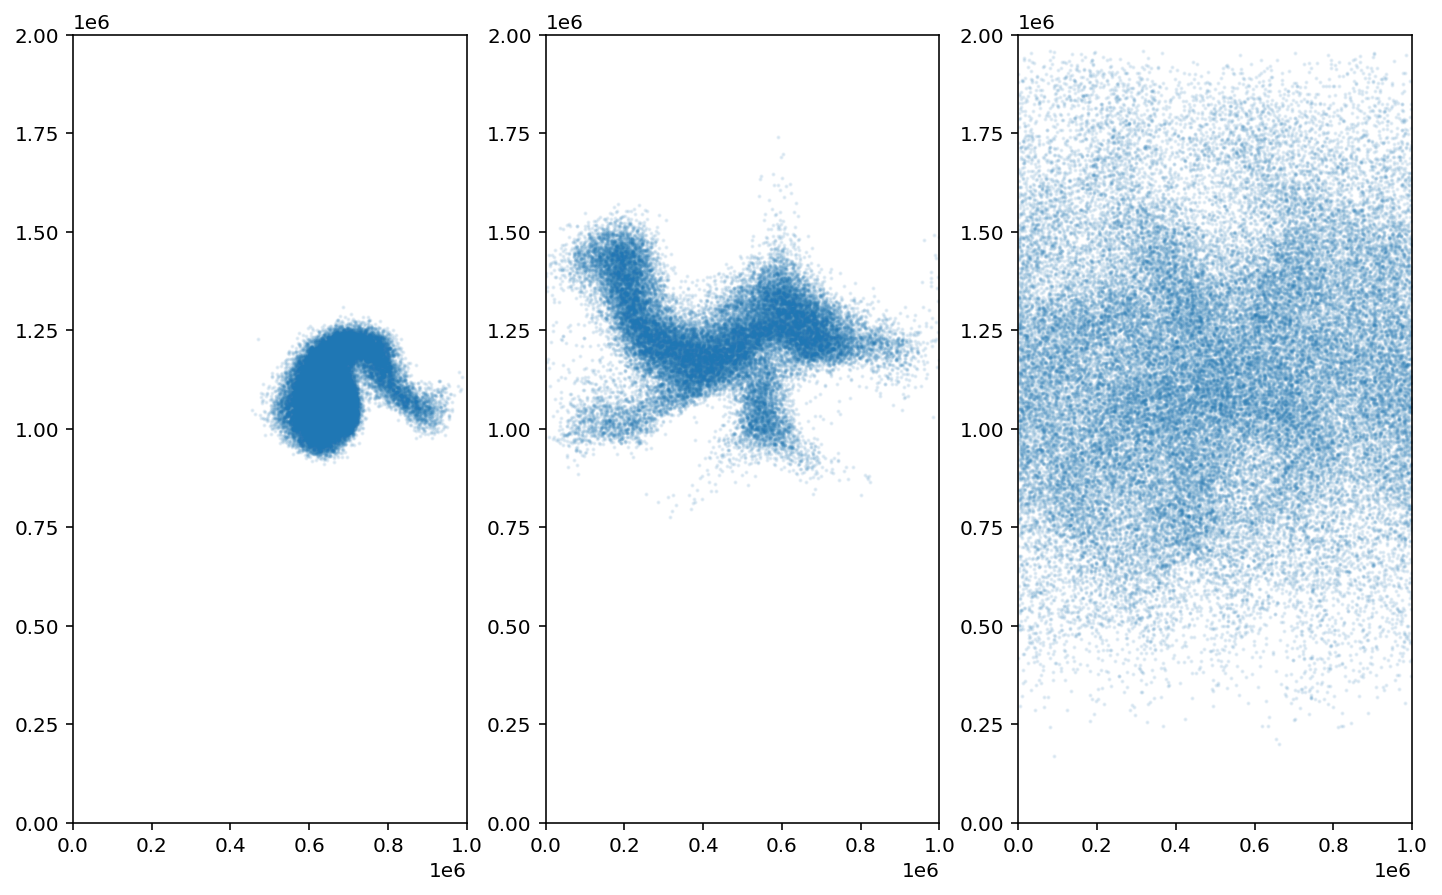

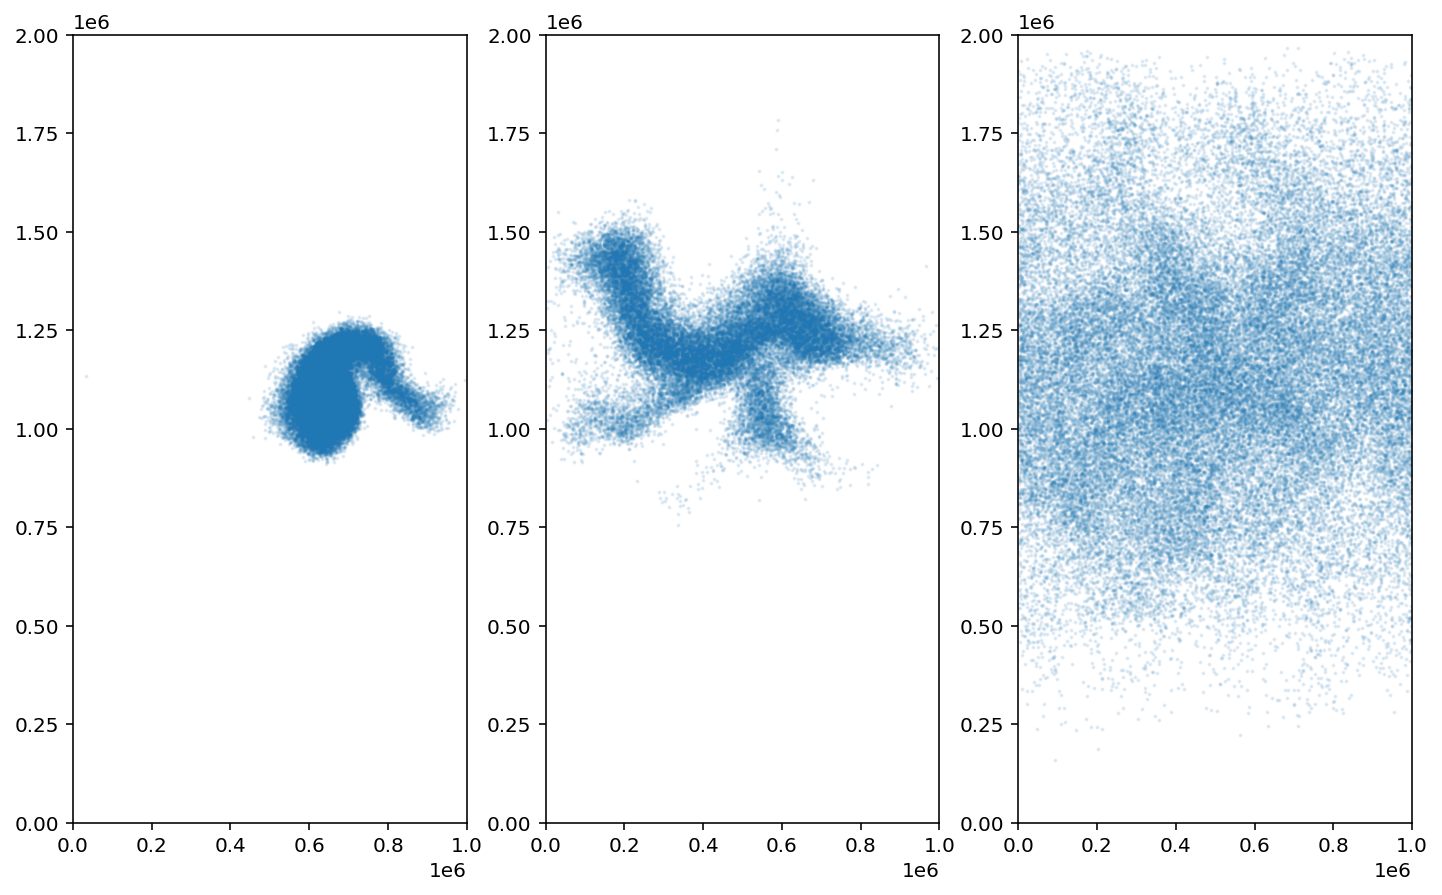

In [8]:
for ds in [ds_fine_adv, ds_coarse_adv, ds_fine_diff_EOS, ds_coarse_diff_EOS, ds_coarse_diff_S, ds_coarse_diff_S_EM]:
    fig, ax = plt.subplots(ncols=3, figsize=(12, 8))
    ds_a = ds.isel(obs=30)
    ds_b = ds.isel(obs=120)
    ds_c = ds.isel(obs=-1)
    ax[0].scatter(ds_a.lon.where(ds_a.z < -1374).where(ds_a.z > -1662), ds_a.lat.where(ds_a.z < -1374).where(ds_a.z > -1662), s=1, alpha=0.1)
    ax[0].set_xlim(0, 1e6)
    ax[0].set_ylim(0, 2e6)
    ax[0].set_aspect(1)
    ax[1].scatter(ds.lon.isel(obs=120).where(ds.z.isel(obs=120) < -1473), ds.lat.isel(obs=120), s=1, alpha=0.1)
    ax[1].set_xlim(0, 1e6)
    ax[1].set_ylim(0, 2e6)
    ax[1].set_aspect(1)
    ax[2].scatter(ds.lon.isel(obs=-1), ds.lat.isel(obs=-1), s=1, alpha=0.1)
    ax[2].set_xlim(0, 1e6)
    ax[2].set_ylim(0, 2e6)
    ax[2].set_aspect(1)
    plt.show()

In [17]:
coords = np.dstack((ds_fine_adv.lon, ds_fine_adv.lat, ds_fine_adv.z))[:, -1, :]

In [18]:
x_bins = np.concatenate((ds_field_coarse.XG.values, np.array([1_000_000.], dtype='float32')))
y_bins = np.concatenate((ds_field_coarse.YG.values, np.array([2_000_000.], dtype='float32')))
z_bins = np.concatenate((ds_field_coarse.Zl.values, np.array([-2985.], dtype='float32')))

In [23]:
count, bins = np.histogramdd(coords, bins=(x_bins, y_bins, np.flip(z_bins)))

In [24]:
coarseVolume = ds_field_coarse.rA * ds_field_coarse.drF

In [25]:
coarseVolume.data.shape

(42, 20, 30)

/nethome/4302001/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


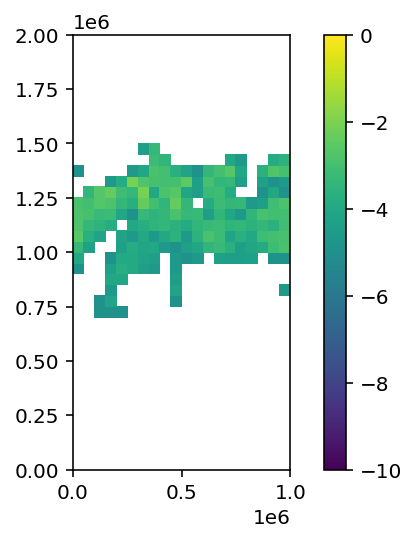

In [26]:
fig, ax = plt.subplots()
tracer = ax.pcolormesh(x_bins, y_bins, np.log10(C0*np.flip(count, axis=2)[:, :, 22].T/(ds_fine_adv.traj.shape[0]*coarseVolume.data[:,:,22])), vmax=0, vmin=-10)
ax.set_aspect(1)
fig.colorbar(tracer)

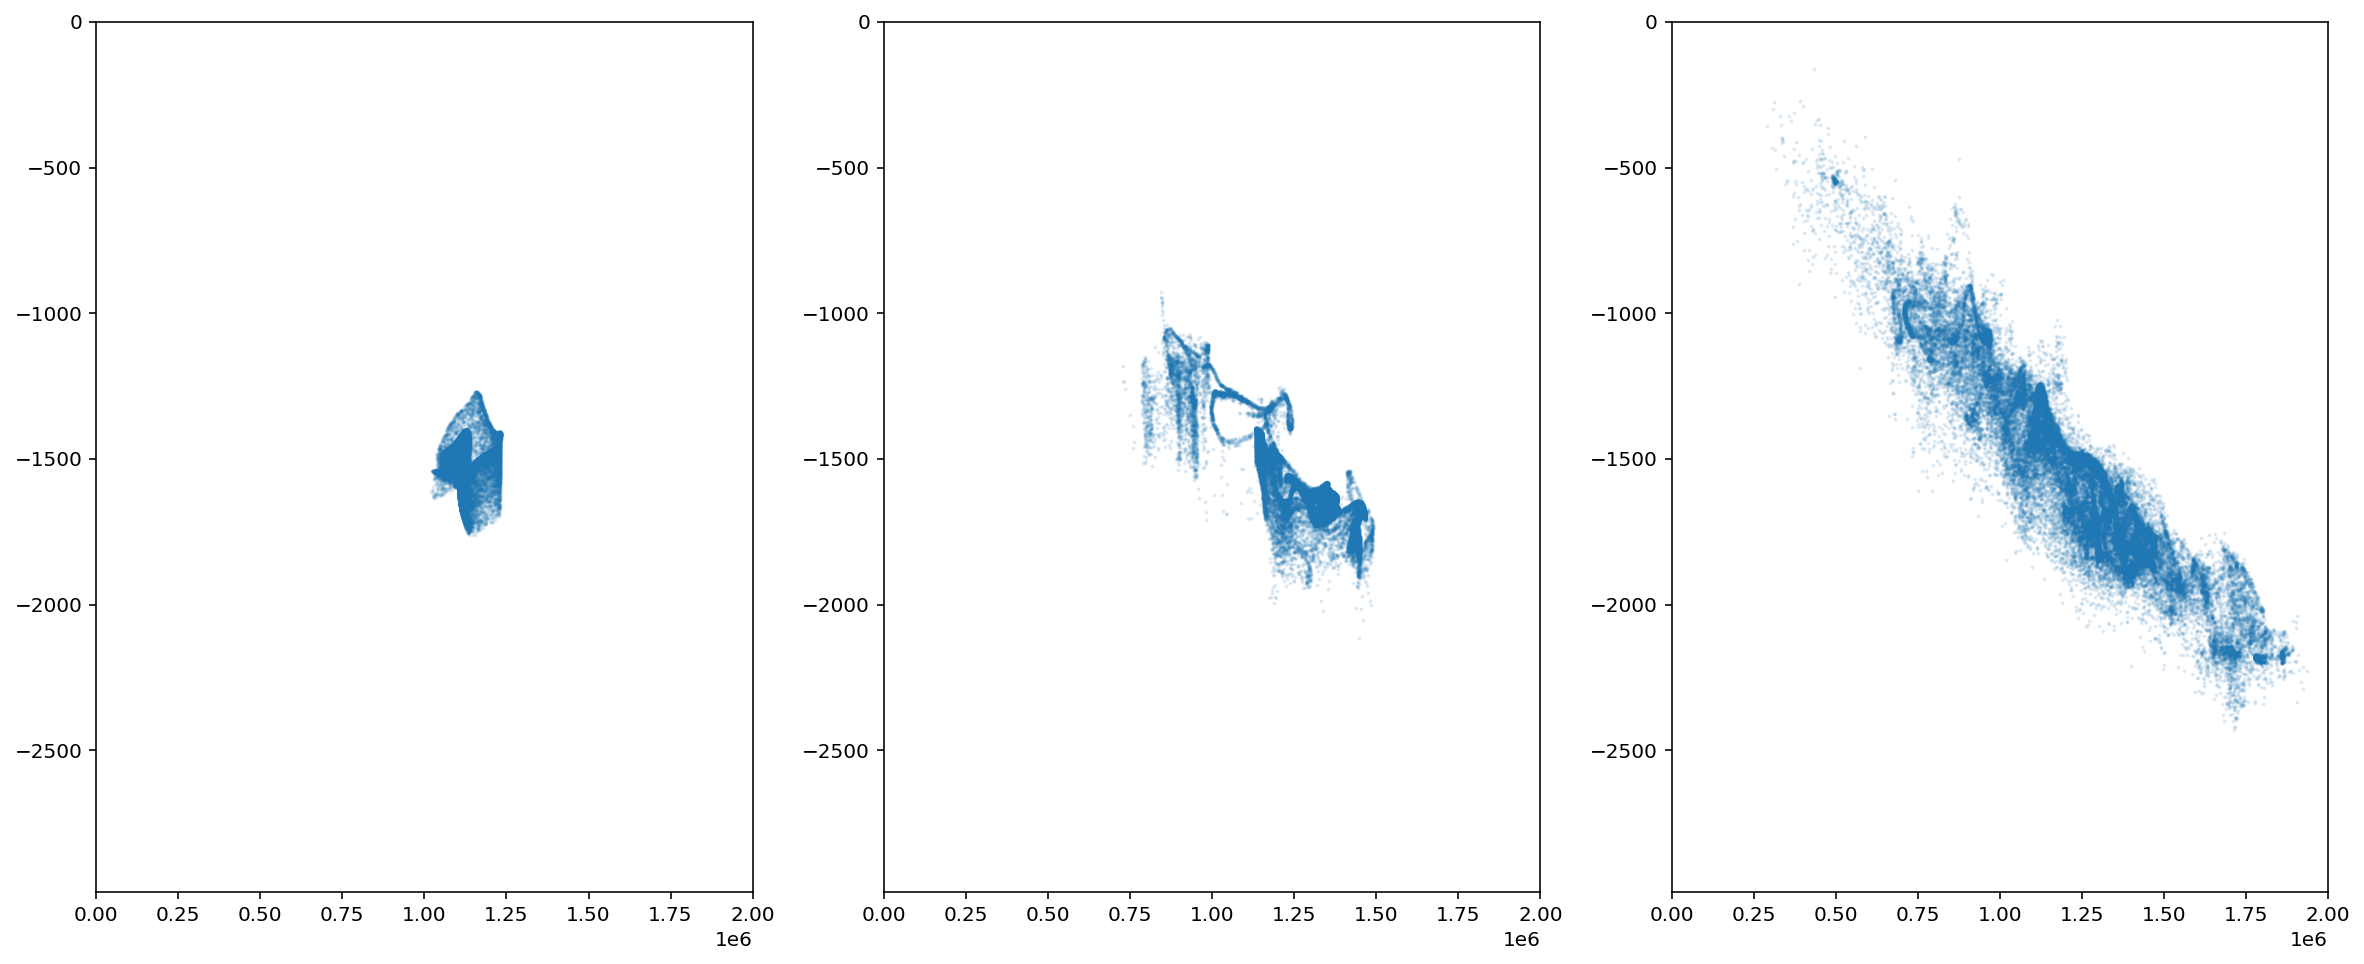

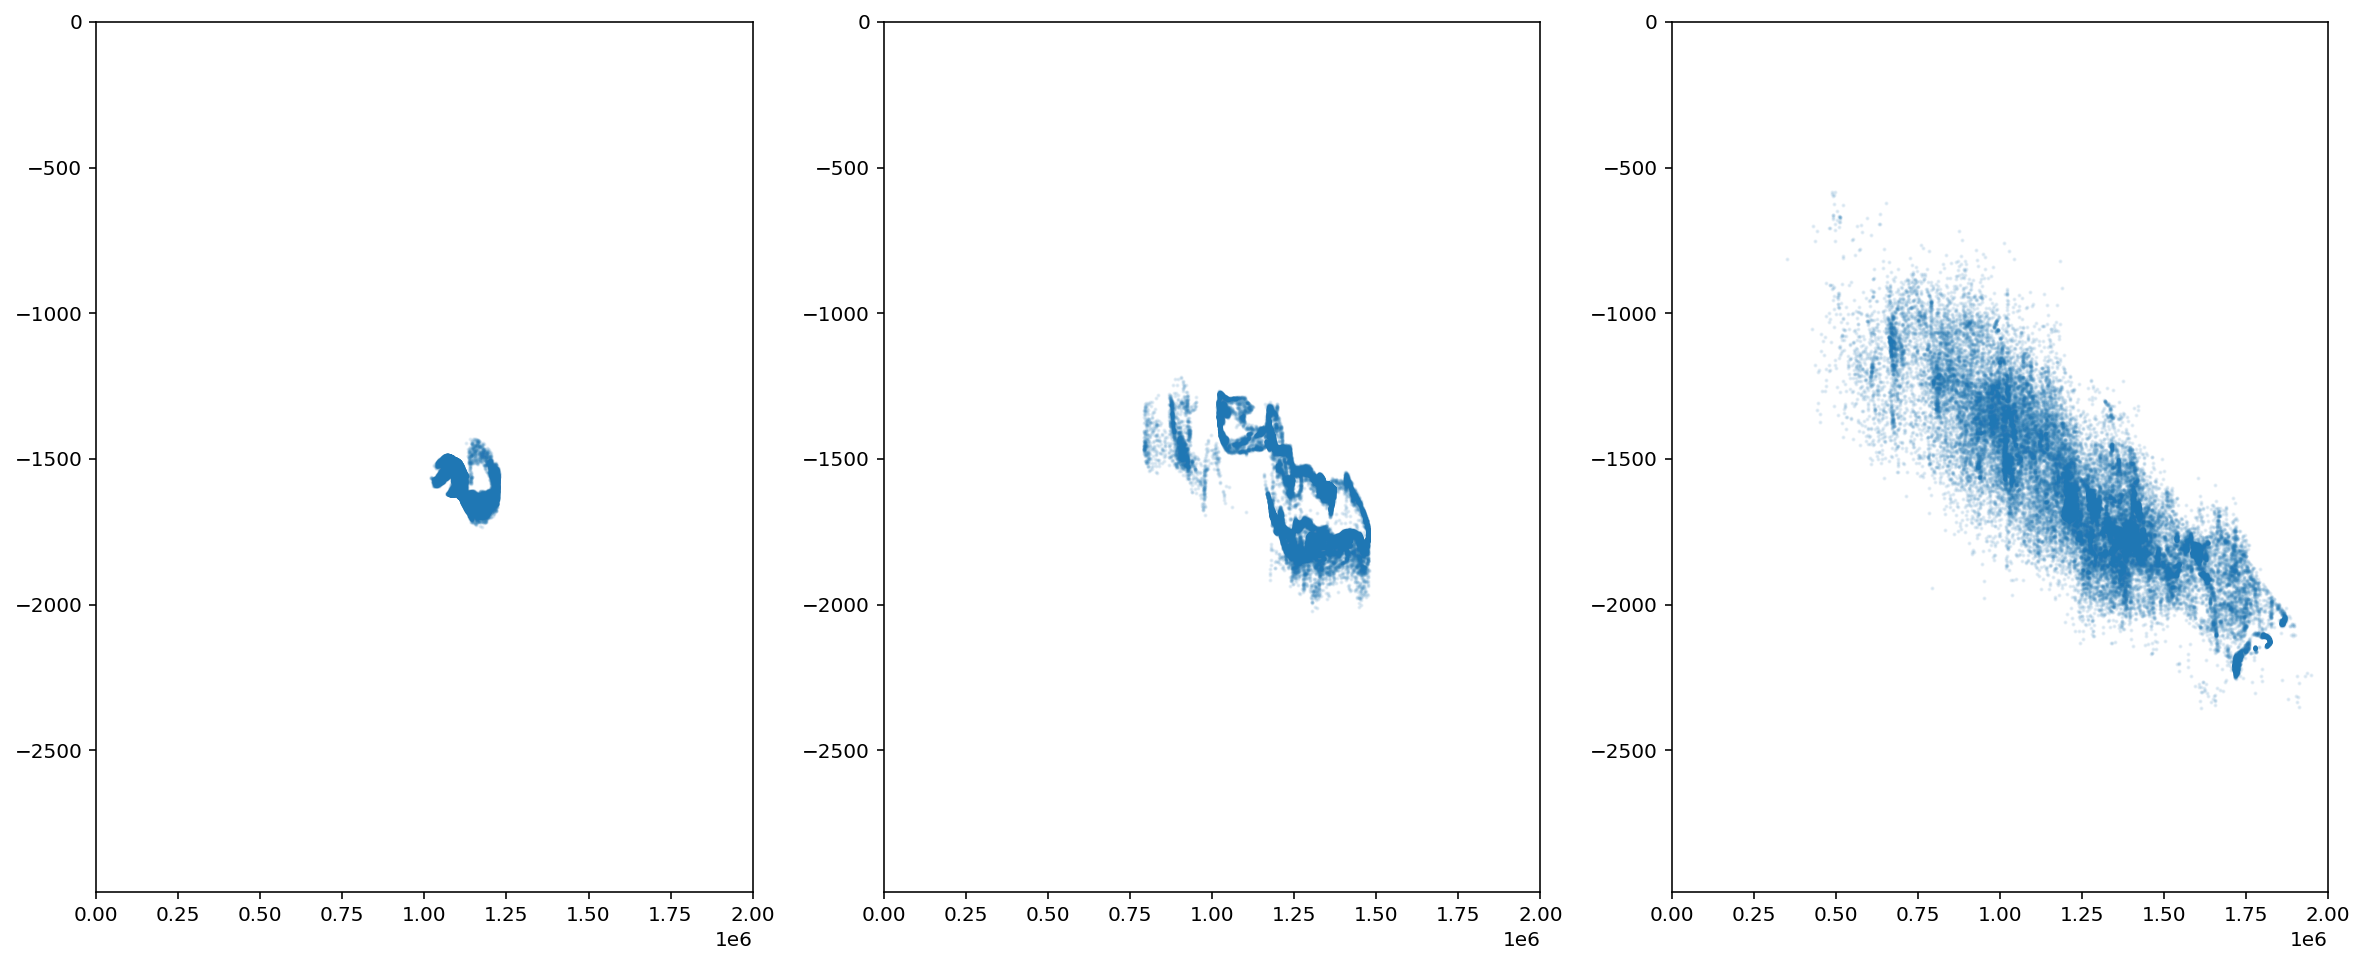

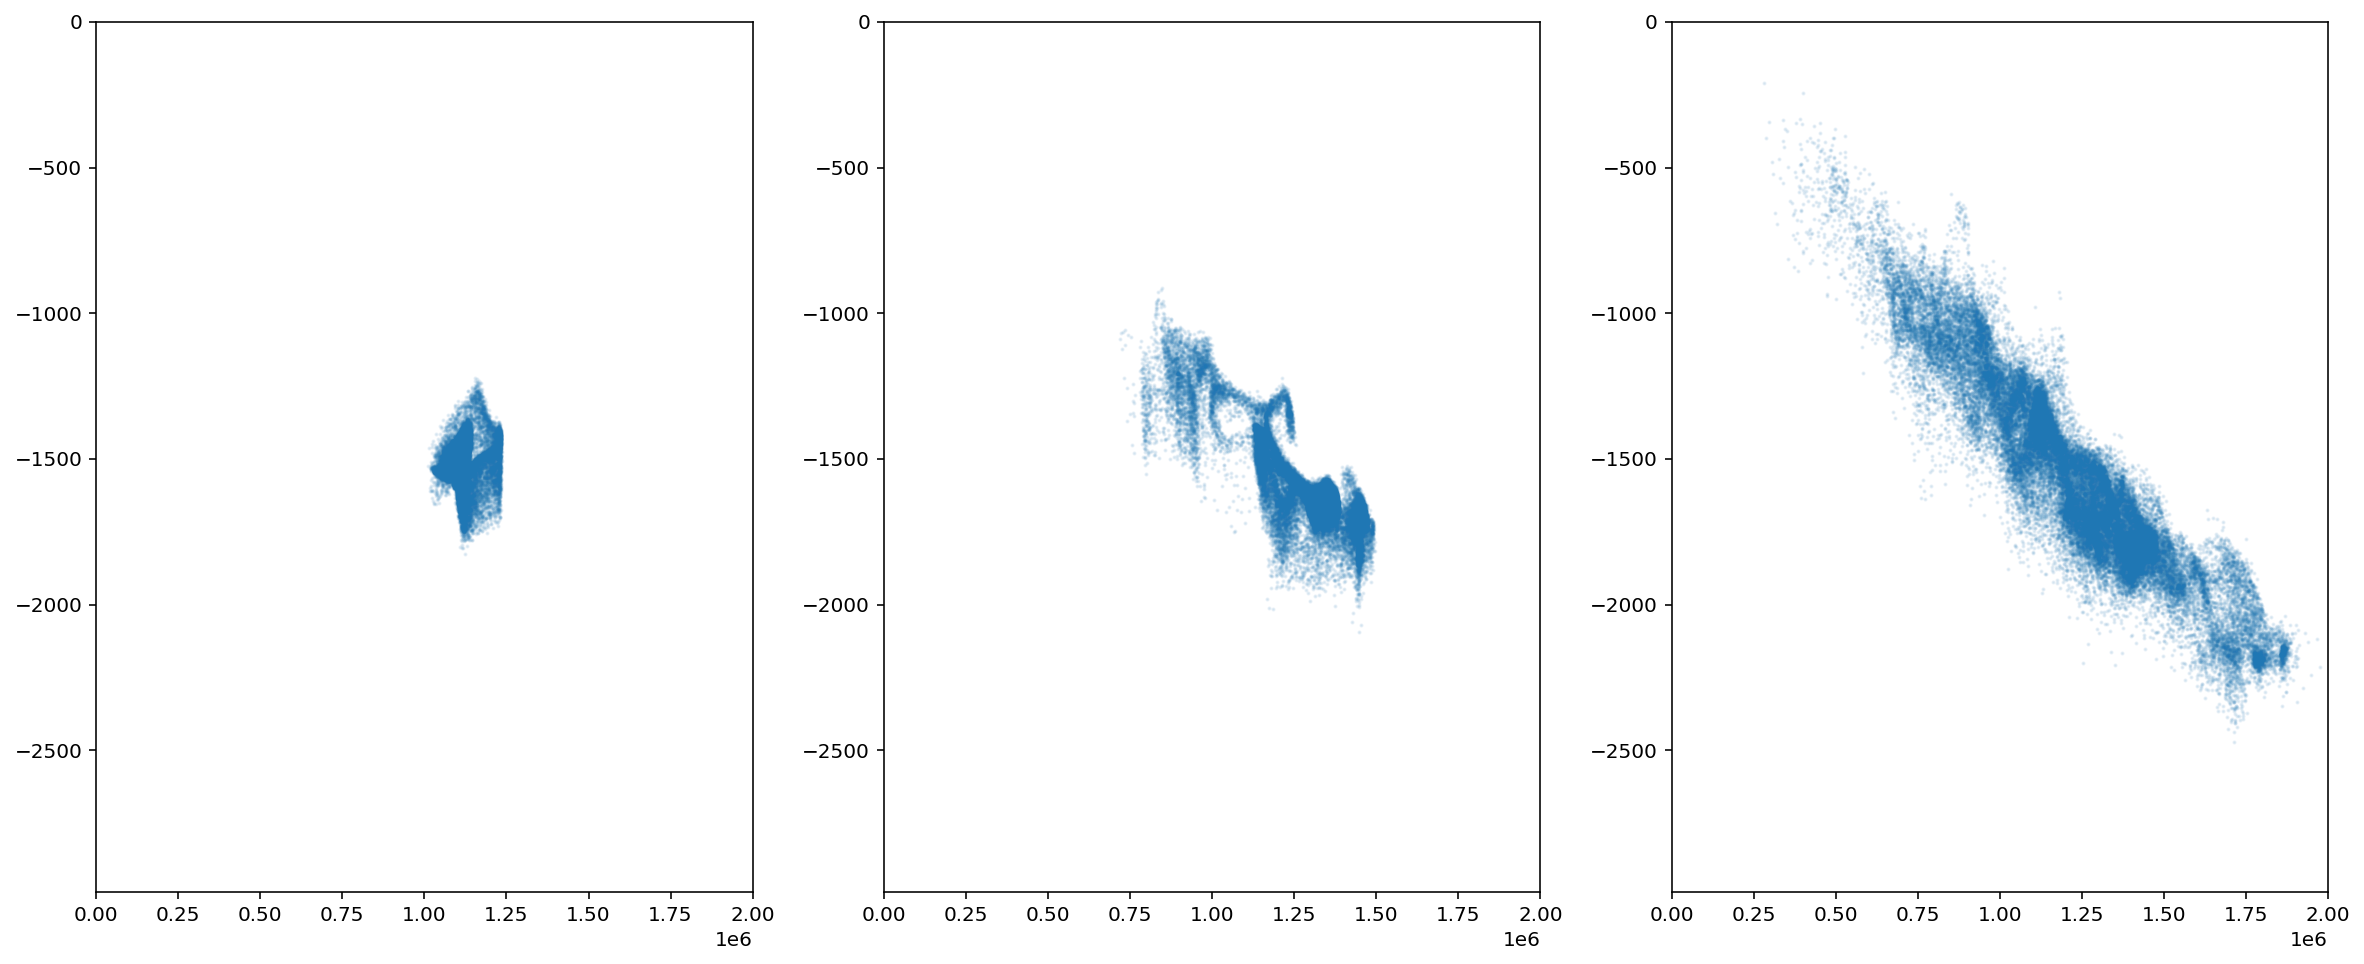

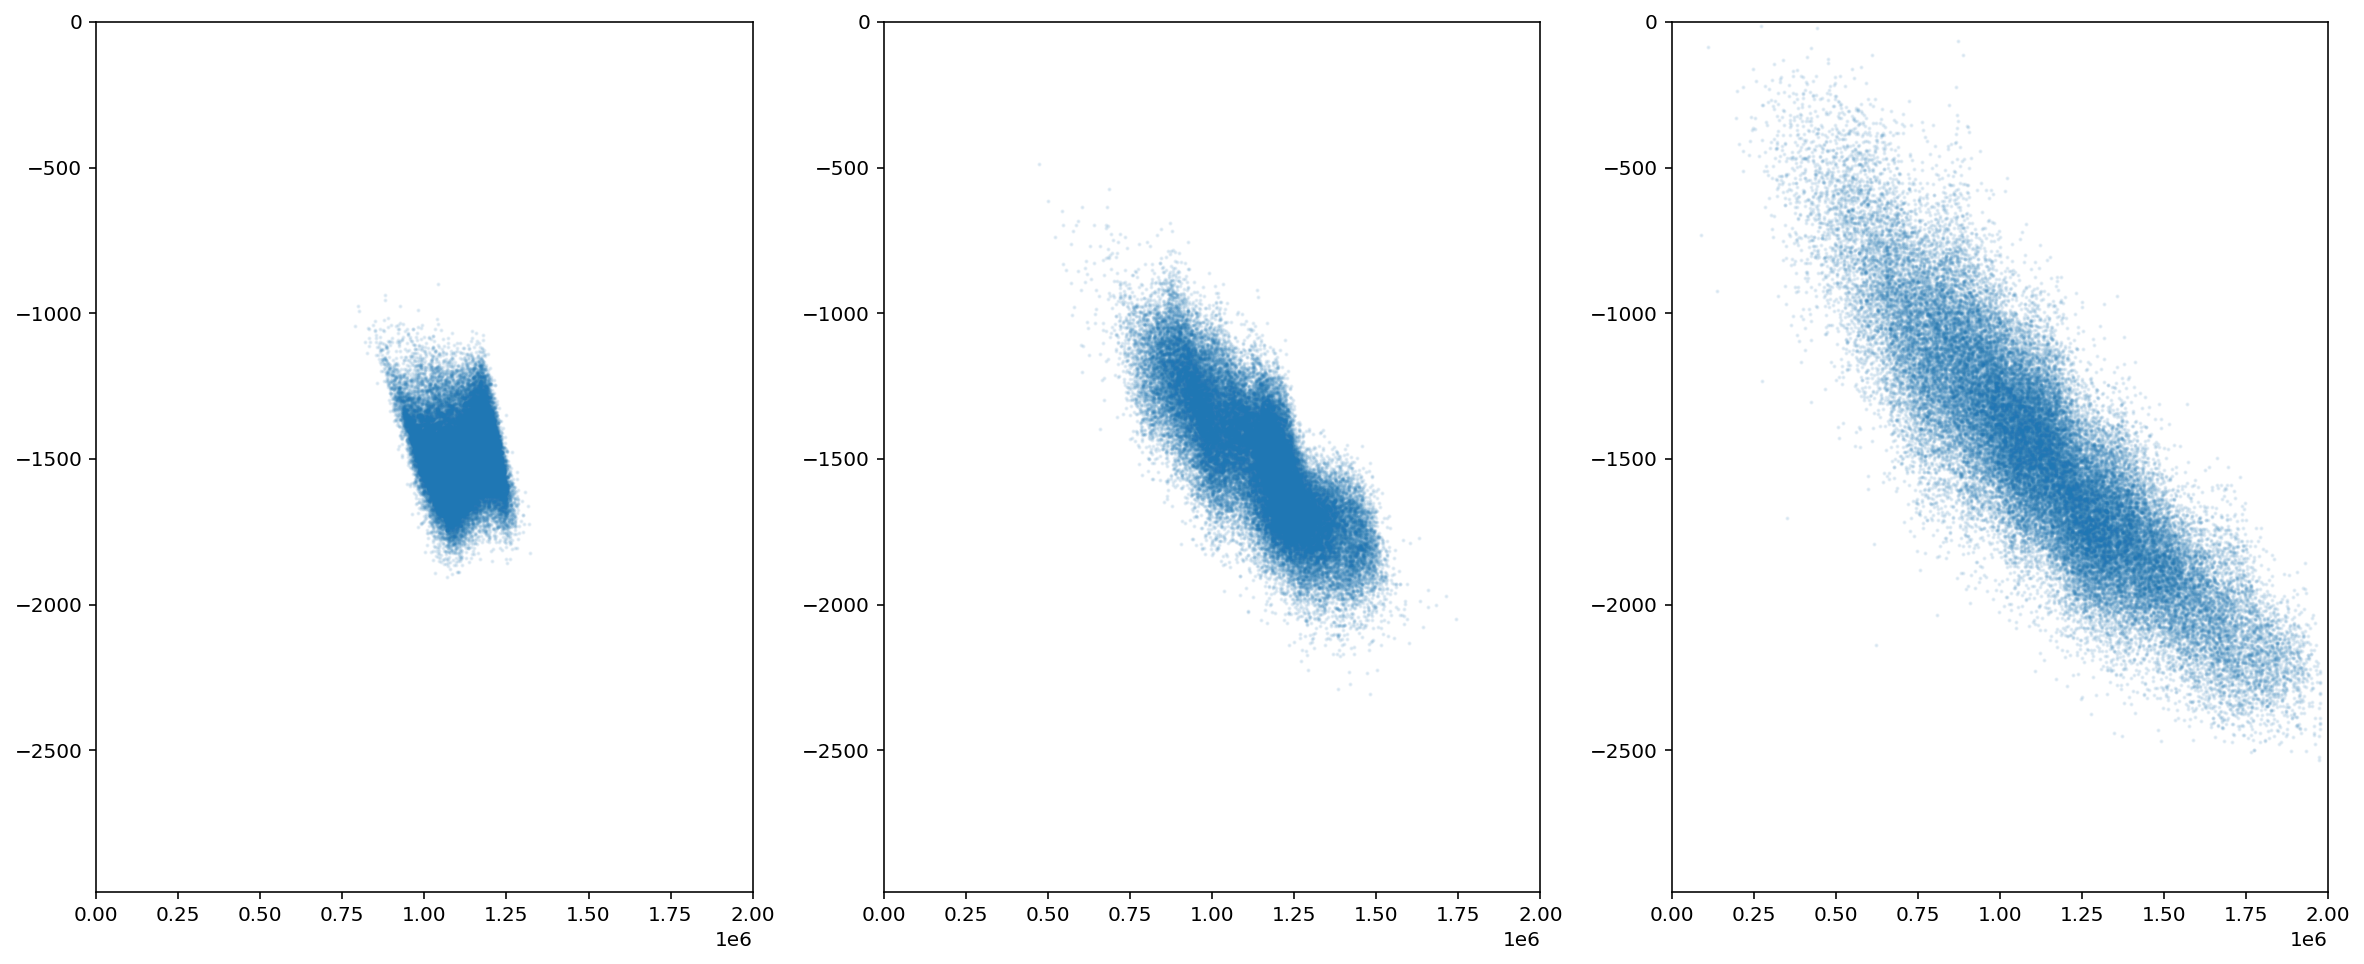

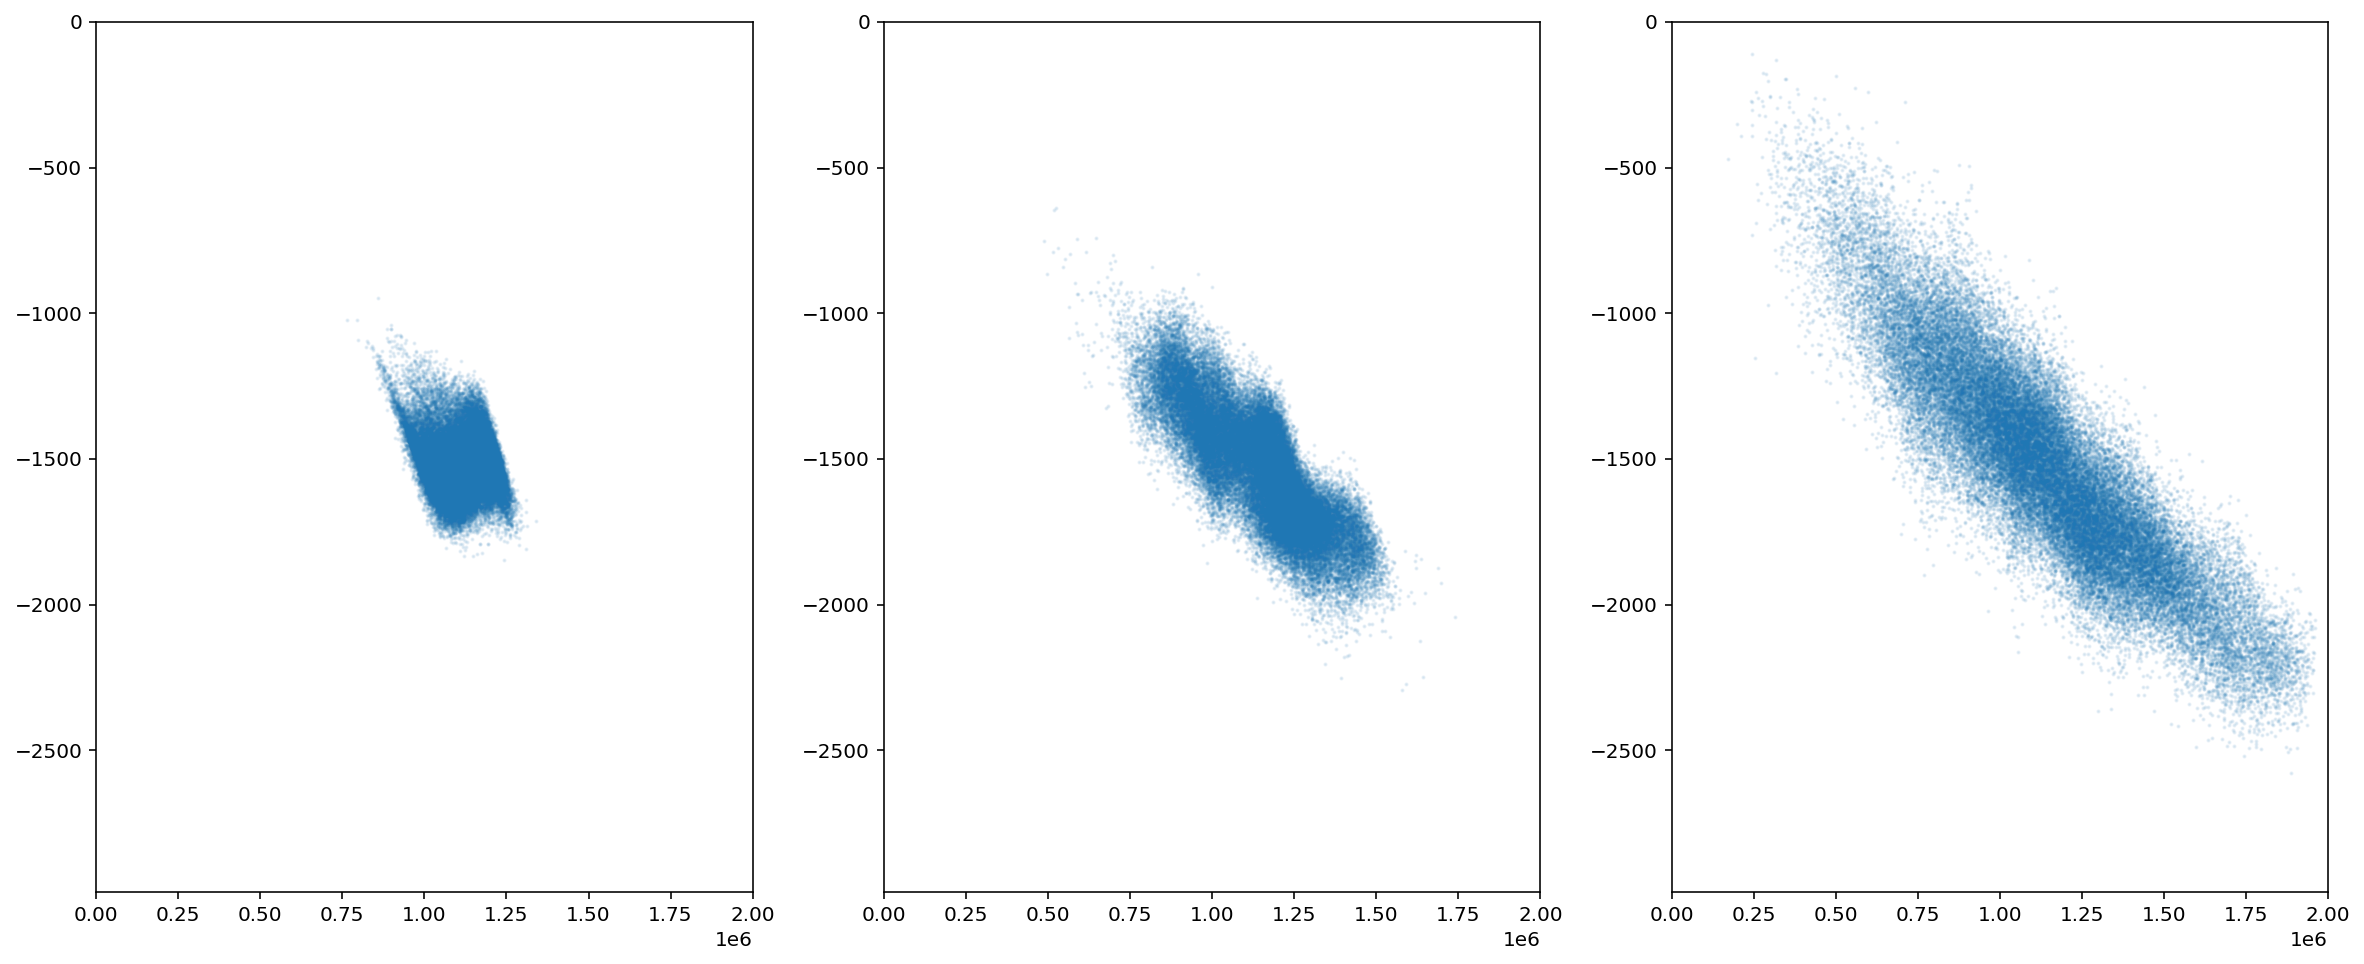

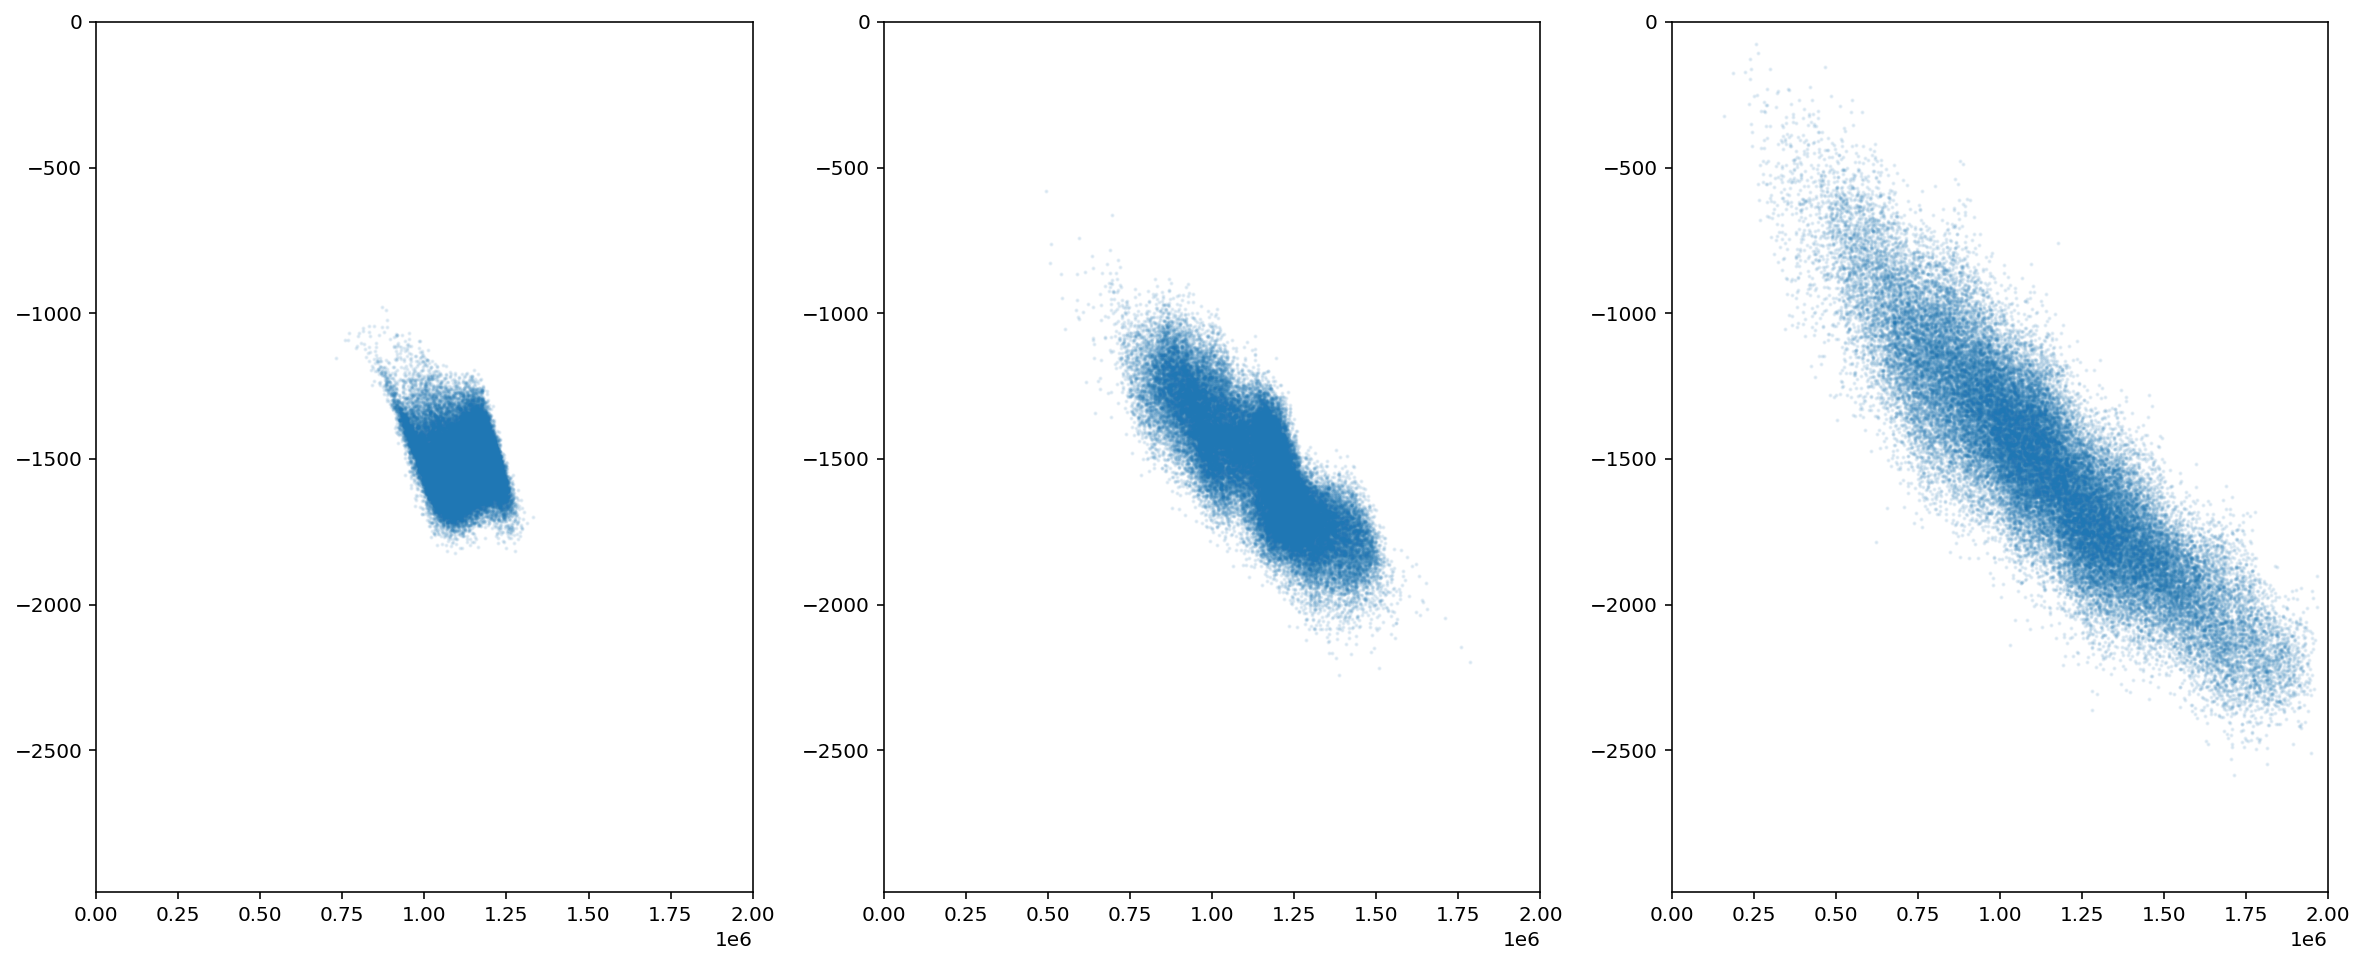

In [27]:
for ds in [ds_fine_adv, ds_coarse_adv, ds_fine_diff_EOS, ds_coarse_diff_EOS, ds_coarse_diff_S, ds_coarse_diff_S_EM]:
    fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
    ax[0].scatter(ds.lat.isel(obs=30), ds.z.isel(obs=30), s=1, alpha=0.1)
    ax[0].set_xlim(0, 2e6)
    ax[0].set_ylim(-2985, 0)
    ax[1].scatter(ds.lat.isel(obs=120), ds.z.isel(obs=120), s=1, alpha=0.1)
    ax[1].set_xlim(0, 2e6)
    ax[1].set_ylim(-2985, 0)
    ax[2].scatter(ds.lat.isel(obs=-1), ds.z.isel(obs=-1), s=1, alpha=0.1)
    ax[2].set_xlim(0, 2e6)
    ax[2].set_ylim(-2985, 0)
    plt.show()